# Lesson 6 Assignment - Advertising Sales Regression

## Author - Tariq Ayub



### Instructions  
Perform four different linear regressions on advertising sales data located in 'Advertising.csv'.  Your dependent feature is 'sales', a measure of sales of a product in a given market in thousands of dollars. 

The independent features for each of the first 3 separate regressions are:

 1. 'TV': advertising dollars spent on TV ads for a single product in a given market
 2. 'radio': advertising dollars spent on radio ads
 3. 'newspaper': advertising dollars spent on newspaper ads

For the first 3 linear regression performed:

- Produce a labeled graph showing the best fit line with the data points.
- Interpret both the slope and y-intercept.
 
The final regression(#4) includes all 3 features: (a) TV, (b) radio, and (c) newspaper. 
- Interpret each partial slope and the intercept parameters.
- Interpret the adjusted R-squared.
- Find and report the mean-squared error.

#### Please prepare this information for a client who may not understand what the parameters mean.


In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load data
filename = 'https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/Advertising.csv'
ad_data = pd.read_csv(filename, index_col=0)
print(ad_data.head())
print(ad_data.shape)
ad_data.describe()

      TV  radio  newspaper  sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9
(200, 4)


,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


Intercept: 7.03259
Slope : 0.04754


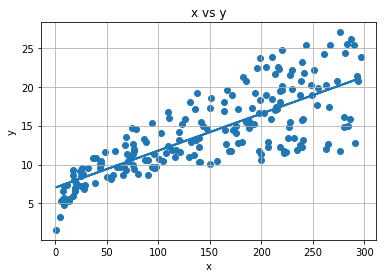

In [6]:
#performing regression without scaling 
from sklearn import linear_model
# from sklearn.linear_model import LinearRegression

# First initialize the model.
linear_model = linear_model.LinearRegression()

# Fit the model to the data
x_input = ad_data['TV'].values.reshape(-1, 1)
y_output = ad_data['sales'].values.reshape(-1, 1)
linear_model.fit(x_input, y_output)

# Get predictions
y_pred = linear_model.predict(x_input)

# Plot output
plt.scatter(x_input, y_output)
plt.plot(x_input, y_pred, linewidth=2)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.title('x vs y')

# Print model parameters
# Get slope (m) and y-intercept (b)
print('Intercept: {0:.5f}'.format(linear_model.intercept_[0]))
print('Slope : {0:.5f}'.format(linear_model.coef_[0][0]))

In [9]:
#regression using stat library
import statsmodels.formula.api as sm

ols_model = sm.ols(formula = 'sales ~ TV', data=ad_data)
# Alternatively:
#ols_model = sm.OLS(y_output, sm.add_constant(x_input))

results = ols_model.fit()

# Get slope (m) and y-intercept (b)
print('Intercept: {0:.5f}'.format(results.params.Intercept))
print('Slope : {0:.5f}'.format(results.params.TV))

Intercept: 7.03259
Slope : 0.04754


In [10]:
# Add predicted to pandas dataframe
ad_data['predicted'] = y_pred
# Add residuals to pandas dataframe
ad_data['resids'] = y_output - y_pred

# View head of data frame
ad_data.head()

,TV,radio,newspaper,sales,predicted,resids
1,230.1,37.8,69.2,22.1,17.970775,4.129225
2,44.5,39.3,45.1,10.4,9.147974,1.252026
3,17.2,45.9,69.3,9.3,7.850224,1.449776
4,151.5,41.3,58.5,18.5,14.234395,4.265605
5,180.8,10.8,58.4,12.9,15.627218,-2.727218


In [11]:
# What are the coefficients?  (m = slope, and b = y-intercept)
m = linear_model.coef_[0]
b = linear_model.intercept_
print('m = {}'.format(m[0]))
print('b = {}'.format(b[0]))

m = 0.047536640433019736
b = 7.0325935491276965


Intercept, Slope : Intercept    7.032594
TV           0.047537
dtype: float64

SSE, SST, SSR, and RMSE:
SSE: 3314.6181668686486
SST: 5417.14875
SSR: 2102.5305831313517
RMSE: 57.57272068322504
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sat, 21 Sep 2019   Prob (F-statistic):           1.47e-42
Time:                        01:34:25   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 c

C:\Users\T\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Residual Histogram')

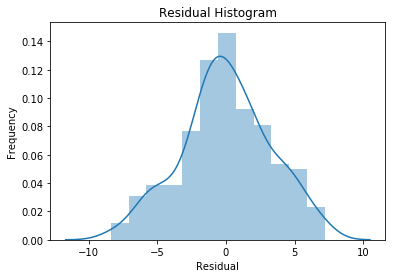

In [12]:
import statsmodels.formula.api as sm
import seaborn as sns

ols_model = sm.ols(formula = 'sales ~ TV', data=ad_data)
# Alternatively:
#ols_model = sm.OLS(y_output, sm.add_constant(x_input))

results = ols_model.fit()

# Get slope (m) and y-intercept (b)
print('Intercept, Slope : {}'.format(results.params))

print('\nSSE, SST, SSR, and RMSE:')
mean_y = np.mean(y_output)
sst = np.sum((y_output - mean_y)**2)
sse = sst - results.ssr
print('SSE: {}'.format(sse))
print('SST: {}'.format(sst))
print('SSR: {}'.format(results.ssr))
print('RMSE: {}'.format(np.sqrt(results.mse_model)))

# Get most of the linear regression statistics we are interested in:
print(results.summary())

# Plot a histogram of the residuals
sns.distplot(results.resid, hist=True)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Residual Histogram')

In [14]:
#scaling TV feature 
# Create a scale function for a column in a pandas df
def scale(col):
    mean_col = np.mean(col)
    sd_col = np.std(col)
    std = (col - mean_col) / sd_col
    return std
#
# scaled_x = (x - min(x))/(max(x) - min(x))
#
# Add scaled x to data frame
ad_data['TV_scale'] = scale(ad_data['TV'])

ad_data.head()

,TV,radio,newspaper,sales,predicted,resids,x_scale,TV_scale
1,230.1,37.8,69.2,22.1,17.970775,4.129225,0.969852,0.969852
2,44.5,39.3,45.1,10.4,9.147974,1.252026,-1.197376,-1.197376
3,17.2,45.9,69.3,9.3,7.850224,1.449776,-1.516155,-1.516155
4,151.5,41.3,58.5,18.5,14.234395,4.265605,0.052050,0.052050
5,180.8,10.8,58.4,12.9,15.627218,-2.727218,0.394182,0.394182


In [18]:
#scaling radio and newspaper as well
def scale(col):
    mean_col = np.mean(col)
    sd_col = np.std(col)
    std = (col - mean_col) / sd_col
    return std
#
# scaled_x = (x - min(x))/(max(x) - min(x))
#
# Add scaled x to data frame
ad_data['radio_scale'] = scale(ad_data['radio'])

ad_data.head()

,TV,radio,newspaper,sales,predicted,resids,x_scale,TV_scale,radio_scale
1,230.1,37.8,69.2,22.1,17.970775,4.129225,0.969852,0.969852,0.981522
2,44.5,39.3,45.1,10.4,9.147974,1.252026,-1.197376,-1.197376,1.082808
3,17.2,45.9,69.3,9.3,7.850224,1.449776,-1.516155,-1.516155,1.528463
4,151.5,41.3,58.5,18.5,14.234395,4.265605,0.052050,0.052050,1.217855
5,180.8,10.8,58.4,12.9,15.627218,-2.727218,0.394182,0.394182,-0.841614


In [19]:
def scale(col):
    mean_col = np.mean(col)
    sd_col = np.std(col)
    std = (col - mean_col) / sd_col
    return std
#
# scaled_x = (x - min(x))/(max(x) - min(x))
#
# Add scaled x to data frame
ad_data['newspaper_scale'] = scale(ad_data['newspaper'])

ad_data.head()

,TV,radio,newspaper,sales,predicted,resids,x_scale,TV_scale,radio_scale,newspaper_scale
1,230.1,37.8,69.2,22.1,17.970775,4.129225,0.969852,0.969852,0.981522,1.778945
2,44.5,39.3,45.1,10.4,9.147974,1.252026,-1.197376,-1.197376,1.082808,0.669579
3,17.2,45.9,69.3,9.3,7.850224,1.449776,-1.516155,-1.516155,1.528463,1.783549
4,151.5,41.3,58.5,18.5,14.234395,4.265605,0.052050,0.052050,1.217855,1.286405
5,180.8,10.8,58.4,12.9,15.627218,-2.727218,0.394182,0.394182,-0.841614,1.281802


Scaled: Intercept, Slope : Intercept    14.022500
TV_scale      4.071006
dtype: float64
Scaled: Intercept t-value, Slope t-value: Intercept    60.855787
TV_scale     17.667626
dtype: float64

Hypothesis test summary for each coefficient if they differ from zero:
Slope:
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            14.0225      0.230     60.856      0.000      13.568      14.477
Intercept:
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             4.0710      0.230     17.668      0.000       3.617       4.525

Scaled: SSE, SST, SSR, and RMSE:
SSE: 3314.6181668686486
SST: 5417.14875
SSR: 2102.530

Text(0.5, 1.0, 'Scaled Residual Histogram')

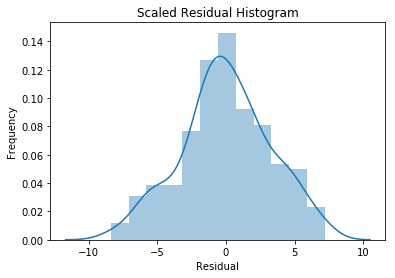

In [15]:
x_scaled = ad_data['TV_scale']
ols_model = sm.ols(formula='sales ~ TV_scale', data = ad_data)

results = ols_model.fit()

# Get slope (m) and y-intercept (b)
print('Scaled: Intercept, Slope : {}'.format(results.params))

# Get the t-values (hypothesis test statistics) for linear regression coefficient hypothesis tests.
print('Scaled: Intercept t-value, Slope t-value: {}'.format(results.tvalues))

# Get p-values for above t-value statistics
print('\nHypothesis test summary for each coefficient if they differ from zero:')
print('Slope:')
print(results.t_test([1,0]))
print('Intercept:')
print(results.t_test([0,1]))

print('\nScaled: SSE, SST, SSR, and RMSE:')
mean_y = np.mean(y_output)
sst = np.sum((y_output - mean_y)**2)
sse = sst - results.ssr
print('SSE: {}'.format(sse))
print('SST: {}'.format(sst))
print('SSR: {}'.format(results.ssr))
print('RMSE: {}'.format(np.sqrt(results.mse_model)))

# Get most of the linear regression statistics we are interested in:
print(results.summary())

# Plot a histogram of the residuals
sns.distplot(results.resid, hist=True)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Scaled Residual Histogram')

Intercept: 14.02250
Slope : 2.99889


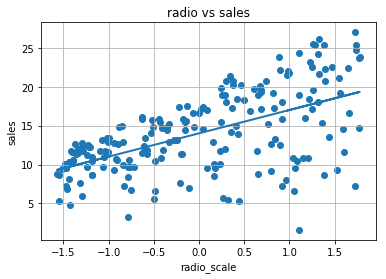

In [20]:
#performing regression for Radio  
from sklearn import linear_model
# from sklearn.linear_model import LinearRegression

# First initialize the model.
linear_model = linear_model.LinearRegression()

# Fit the model to the data
x_input = ad_data['radio_scale'].values.reshape(-1, 1)
y_output = ad_data['sales'].values.reshape(-1, 1)
linear_model.fit(x_input, y_output)

# Get predictions
y_pred = linear_model.predict(x_input)

# Plot output
plt.scatter(x_input, y_output)
plt.plot(x_input, y_pred, linewidth=2)
plt.grid(True)
plt.xlabel('radio_scale')
plt.ylabel('sales')
plt.title('radio vs sales')

# Print model parameters
# Get slope (m) and y-intercept (b)
print('Intercept: {0:.5f}'.format(linear_model.intercept_[0]))
print('Slope : {0:.5f}'.format(linear_model.coef_[0][0]))

In [29]:
#performing regression for newspaper 
from sklearn import linear_model
# from sklearn.linear_model import LinearRegression

# First initialize the model.
linear_model = linear_model.LinearRegression()

# Fit the model to the data
x_input = ad_data['newspaper_scale'].values.reshape(-1, 1)
y_output = ad_data['sales'].values.reshape(-1, 1)
linear_model.fit(x_input, y_output)

# Get predictions
y_pred = linear_model.predict(x_input)

# Plot output
plt.scatter(x_input, y_output)
plt.plot(x_input, y_pred, linewidth=2)
plt.grid(True)
plt.xlabel('newspaper_scale')
plt.ylabel('sales')
plt.title('newspaper vs sales')

# Print model parameters
# Get slope (m) and y-intercept (b)
print('Intercept: {0:.5f}'.format(linear_model.intercept_[0]))
print('Slope : {0:.5f}'.format(linear_model.coef_[0][0]))

Intercept: 14.02250
Slope : 1.18816


In [44]:
import statsmodels.formula.api as sm
import seaborn as sns
# replace the ??? with the correct parameters

# Switch to Stats Model Package
# Fit the model and get the linear model summaries/plots.
x5_input = ad_data[['newspaper_scale', 'radio_scale', 'TV_scale']].values
y5_output = ad_data['sales']
ols_model = sm.ols(formula='sales ~ newspaper_scale + radio_scale + TV_scale', data = ad_data) # Use a simple formula and the data generated above

results = ols_model.fit()

# Get slope (m) and y-intercept (b)
print('Intercept: {0:.5f}'.format(results.params.Intercept))
print('Slope : {0:.5f}'.format(results.params.newspaper_scale))
print('Slope : {0:.5f}'.format(results.params.radio_scale))
print('Slope : {0:.5f}'.format(results.params.TV_scale))




Intercept: 14.02250
Slope : -0.02254
Slope : 2.79206
Slope : 3.91925


In [48]:
x_scaled = ad_data[['newspaper_scale', 'radio_scale', 'TV_scale']].values
ols_model = sm.ols(formula='sales ~ newspaper_scale + radio_scale + TV_scale', data = ad_data) # Use a simple formula and the data generated above

results = ols_model.fit()

# Get slope (m) and y-intercept (b)
print('Scaled: Intercept, Slope : {}'.format(results.params))

# Get the t-values (hypothesis test statistics) for linear regression coefficient hypothesis tests.
print('Scaled: Intercept t-value, Slope t-value: {}'.format(results.tvalues))


print('\nScaled: SSE, SST, SSR, and RMSE:')
mean_y = np.mean(y_output)
sst = np.sum((y_output - mean_y)**2)
sse = sst - results.ssr
print('SSE: {}'.format(sse))
print('SST: {}'.format(sst))
print('SSR: {}'.format(results.ssr))
print('RMSE: {}'.format(np.sqrt(results.mse_model)))

# Get most of the linear regression statistics we are interested in:
print(results.summary())


Scaled: Intercept, Slope : Intercept          14.022500
newspaper_scale    -0.022539
radio_scale         2.792063
TV_scale            3.919254
dtype: float64
Scaled: Intercept t-value, Slope t-value: Intercept          117.654628
newspaper_scale     -0.176715
radio_scale         21.893496
TV_scale            32.808624
dtype: float64

Scaled: SSE, SST, SSR, and RMSE:
SSE: 4860.323487097813
SST: 5417.14875
SSR: 556.8252629021872
RMSE: 40.250563089633964
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sat, 21 Sep 2019   Prob (F-statistic):           1.58e-96
Time:                        02:56:11   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                          

In [46]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sat, 21 Sep 2019   Prob (F-statistic):           1.58e-96
Time:                        02:53:59   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          14.0225      0.119    117.655      0.000      13.787      14.258
newspaper_scale    -0.0225      0.128     -0.177      0.860      -0.274       0.229
radio_scale         2.7921      0.128     21.893      0.000       2.541       3.044
TV_scale            3.9193      0.119     32.809      0.000       3.684       4.155
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         1.46
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#R squared is near 90% which is an indicator that model is very reliable and 
# the increase in sales is highly correlated to the features

In [ ]:
#standard error which is the actual vs predicted Y is almost the same for 
#all feature except slightly being more accurate for TV

In [ ]:
#TV is the most effective way to increase sales since it has the highest slope
#followed by radio and newspaper

In [ ]:
#SSR: 556 is the sum of difference in the actual Y and the predicted Y. in simple words distance of
# the predicted value on the graph from the slope

In [ ]:
# mean squared error or sum of squared errors is SSE: 4860 it is the distance of the predicted slope from the mean
# we are not good at explaining the variation in the mean with this model. This could be partically
# becuase of highly indipendent nature of feature which is indicated by the difference in their slope

In [ ]:
#a high SST is the distance of predicted mean from the actual. A high SST is indicated that the data
# may not be normally distributed